In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:/Users/partkulk/Downloads/dl_parth/deep-learning/student-admissions/student_data.csv')

In [3]:
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [4]:
def plot_graph(data):
    admitted = data[data["admit"]==1]
    rejected = data[data["admit"]==0]
    plt.scatter(admitted[:]["gre"],admitted[:]["gpa"],c='cyan',edgecolor='k')
    plt.scatter(rejected[:]["gre"],rejected[:]["gpa"],c='r',edgecolor='k')
    plt.xlabel("GRE")
    plt.ylabel("GPA")
    plt.show()

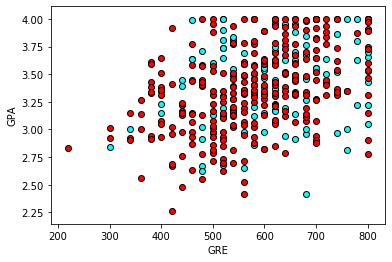

In [5]:
plot_graph(data)

In [6]:
data_rank1 = data[data["rank"]==1]
data_rank2 = data[data["rank"]==2]
data_rank3 = data[data["rank"]==3]
data_rank4 = data[data["rank"]==4]

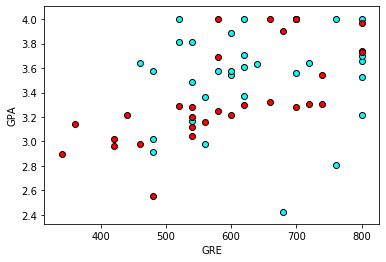

In [7]:
plot_graph(data_rank1)

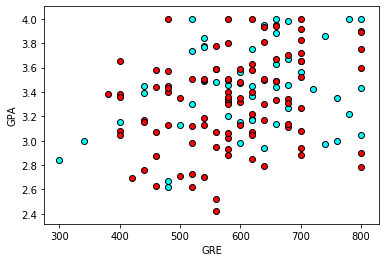

In [8]:
plot_graph(data_rank2)

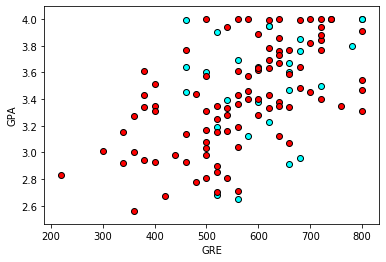

In [9]:
plot_graph(data_rank3)

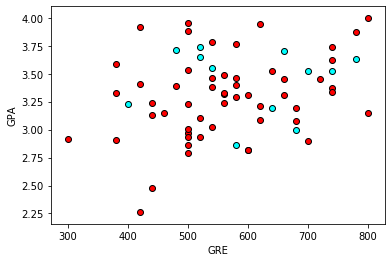

In [10]:
plot_graph(data_rank4)

In [11]:
data = pd.get_dummies(data,columns=['rank'],prefix=['rank'])

In [12]:
data.head()

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1


In [13]:
from sklearn.preprocessing import MinMaxScaler
encoder = MinMaxScaler()
data[["gre","gpa"]] = encoder.fit_transform(data[["gre","gpa"]])

In [14]:
data

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.275862,0.775862,0,0,1,0
1,1,0.758621,0.810345,0,0,1,0
2,1,1.000000,1.000000,1,0,0,0
3,1,0.724138,0.534483,0,0,0,1
4,0,0.517241,0.385057,0,0,0,1
...,...,...,...,...,...,...,...
395,0,0.689655,1.000000,0,1,0,0
396,0,0.586207,0.448276,0,0,1,0
397,0,0.413793,0.212644,0,1,0,0
398,0,0.827586,0.798851,0,1,0,0


In [15]:
import keras
y = data['admit']
X = data.drop(['admit'],axis=1)
y = np.array(keras.utils.to_categorical(y, 2))

Using TensorFlow backend.


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [17]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((320, 6), (80, 6), (320, 2), (80, 2))

In [18]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [29]:
model = Sequential()
model.add(Dense(128,activation = 'relu',input_dim = 6))
model.add(Dropout(0.2))
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(2,activation = 'softmax'))

In [30]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               896       
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 130       
Total params: 9,282
Trainable params: 9,282
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(X, y, epochs=200, batch_size=100, verbose=0)

In [32]:
score = model.evaluate(X_train,y_train)

320/320 [==============================] - 0s 499us/step


In [33]:
score

[0.18212099075317384, 0.734375]

In [34]:
score = model.evaluate(X_test,y_test)

80/80 [==============================] - 0s 62us/step


In [35]:
score

[0.2093241900205612, 0.6875]